In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [2]:
x=pd.read_csv(r'C:\ML\Housing\Housingdata.csv')

In [3]:
x.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [4]:
x.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560262,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [5]:
x.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [6]:
x.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX          int64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [7]:
y=x.MEDV 
x=x.drop(columns=['MEDV'],axis=1)

In [8]:
x.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN


In [9]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64

In [10]:
CRIM_median_train=x.CRIM.median()
x.CRIM=x.CRIM.fillna(CRIM_median_train)
print(CRIM_median_train)

0.253715


In [11]:
ZN_median_train=x.ZN.median()
x.ZN=x.ZN.fillna(ZN_median_train)
print(ZN_median_train)

0.0


In [12]:
INDUS_median_train=x.INDUS.median()
x.INDUS=x.INDUS.fillna(INDUS_median_train)
print(INDUS_median_train)

9.69


In [13]:
x.isnull().sum()

CRIM        0
ZN          0
INDUS       0
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
dtype: int64

In [14]:
x['CHAS']=x['CHAS'].fillna(0)

In [15]:
x.isnull().sum()

CRIM        0
ZN          0
INDUS       0
CHAS        0
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
dtype: int64

In [16]:
AGE_median_train=x.AGE.median()
x.AGE=x.AGE.fillna(AGE_median_train)
print(AGE_median_train)

76.80000000000001


In [17]:
x.isnull().sum()

CRIM        0
ZN          0
INDUS       0
CHAS        0
NOX         0
RM          0
AGE         0
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
dtype: int64

In [18]:
LSTAT_median_train=x.LSTAT.median()
x.LSTAT=x.LSTAT.fillna(LSTAT_median_train)
print(LSTAT_median_train)

11.43


In [19]:
x.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

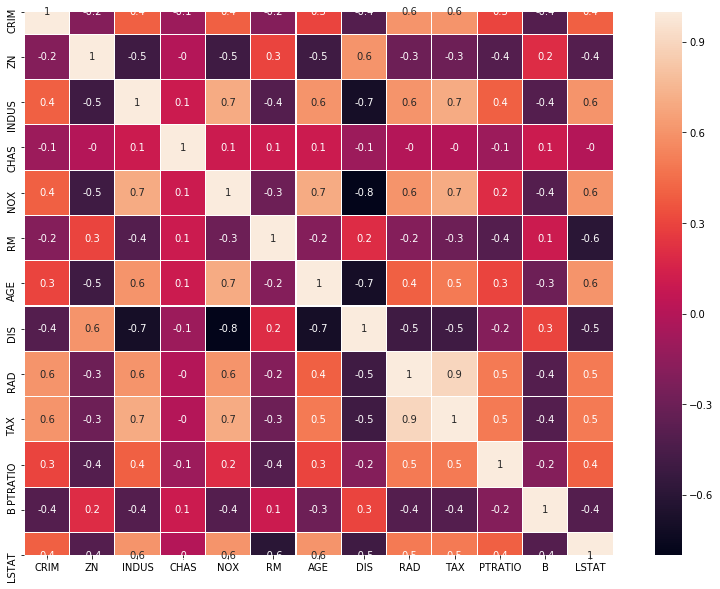

In [20]:
corr_matrix=x.corr().round(1)
plt.figure(figsize=(15,10))
sns.heatmap(data=corr_matrix, annot=True, linewidths=0.1, square=True)

In [21]:
x['TAXRAD']= x['TAX']+x['RAD']
x=x.drop(['TAX','RAD','NOX'], axis=1)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023727732888>,
      dtype=object)

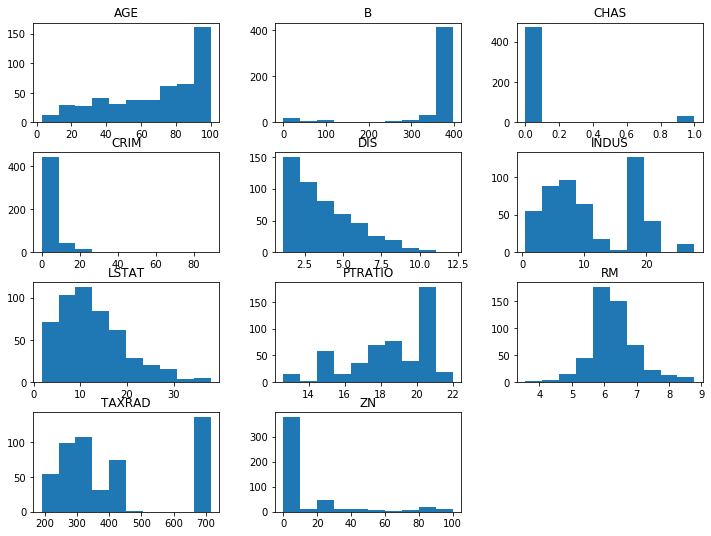

In [22]:
x.hist(bins=10,figsize=(12,9),grid=False)

In [23]:
x['AGE']=np.log(x['AGE'])

In [24]:
x['B']=np.log(x['B'])

In [25]:
x['DIS']=np.log(x['DIS'])

In [26]:
x['LSTAT']=np.log(x['LSTAT'])

In [27]:
x['TAXRAD']=np.log(x['TAXRAD'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000237275B7F48>,
      dtype=object)

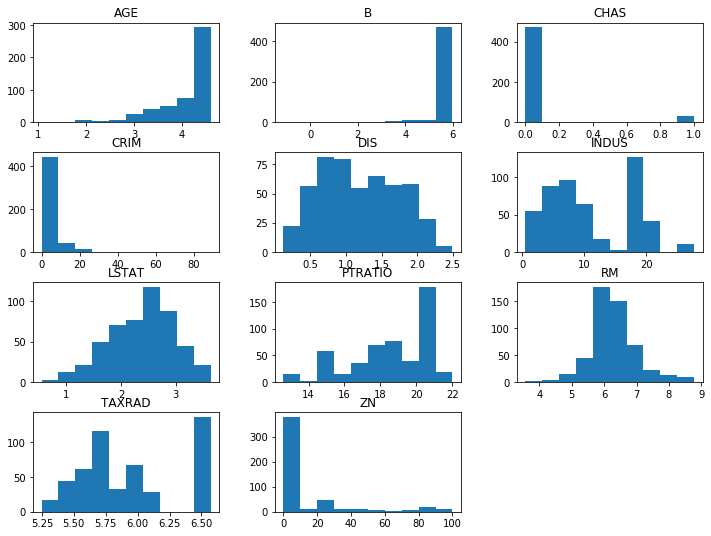

In [28]:
x.hist(bins=10,figsize=(12,9),grid=False)

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [30]:
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.3,random_state=100)

In [31]:
coef=LinearRegression()
coef.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [32]:
Y_pred = coef.predict(x_test)

In [33]:
print(Y_pred)

[31.79799936 33.97839314 24.34194223 18.54550998 19.88306354 24.17875615
 25.58851061 22.183435   22.60294516 18.47017195 25.10459239 15.48567691
 21.31714618 15.25668127 39.4843414  25.4225438  29.36239976 19.0312195
 29.18271549 43.84491882 33.47217443 14.24314892 19.88427188 17.09454124
 17.78660219 11.27403275 27.96713333 16.81633172 14.6624317  19.26395187
 18.12006763 22.17143809 39.54757763 25.45883609 29.28109804 34.82159479
 12.87719069 13.41832361 13.57876357 23.35883519 20.82572369 23.90557144
 13.60222665 22.07387405 33.38649385 25.13718112 15.20222782 18.50446684
 13.24894196 10.45574095 21.73462175 20.403375   21.85695645 25.72298816
 10.0328235  14.93820397 31.31161712 39.62481101  9.26218164 19.03523272
 16.42539795 19.45695551 20.67091299 31.62500761 22.93546714 24.35901893
 16.71469044 29.4697164  20.23378299 20.9933094  17.12115833 21.9288715
  6.50683844 16.40557226 32.10919126  9.70826555 26.35431412 37.77909677
 12.69612794 27.28615311 38.71112456 38.61519329 14.6

In [34]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(coef,x,y)
print(scores)

[ 0.7095605   0.50772293 -0.31546174]


C:\Users\Sohan\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [35]:
print('Variance score: %.2f' % r2_score(y_test, Y_pred))

Variance score: 0.73


In [36]:
from math import sqrt

In [37]:
rmse=sqrt(mean_squared_error(y_test, Y_pred))

In [38]:
print(rmse)

5.1889430941264


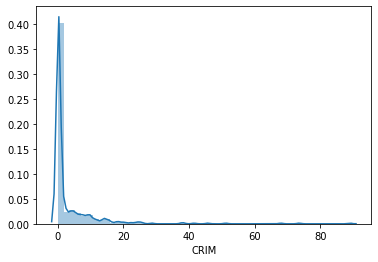

In [39]:
sns.distplot(x.CRIM)

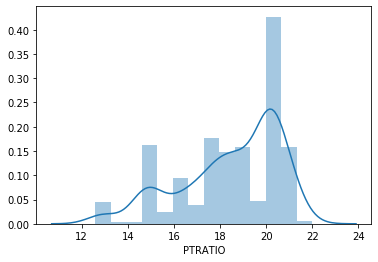

In [40]:
sns.distplot(x.PTRATIO)

In [41]:
y.describe()

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: MEDV, dtype: float64